In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dir = '/content/drive/MyDrive/OS Collected Data/sample/Training'
test_dir = '/content/drive/MyDrive/OS Collected Data/sample/Testing'

img_width, img_height = 150, 150

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1557 images belonging to 3 classes.
Found 390 images belonging to 3 classes.


In [5]:
# CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn_history = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[EarlyStopping(monitor='loss', patience=3)]
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.6802 - loss: 0.7136 - val_accuracy: 0.6974 - val_loss: 0.6555
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.6540 - loss: 0.7482 - val_accuracy: 0.7077 - val_loss: 0.6703
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.6723 - loss: 0.7298 - val_accuracy: 0.6872 - val_loss: 0.6601
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.6711 - loss: 0.7244 - val_accuracy: 0.6872 - val_loss: 0.6765
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.6727 - loss: 0.7260 - val_accuracy: 0.7154 - val_loss: 0.6633
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.6686 - loss: 0.7303 - val_accuracy: 0.6846 - val_loss: 0.6738
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.6881 - loss: 0.7199 - val_accuracy: 0.6359 - val_loss: 0.6973
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.6460 - loss: 0.7389 - val_accuracy: 0.7256 - v

In [12]:
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7045 - loss: 0.6642
Test accuracy: 0.7076923251152039


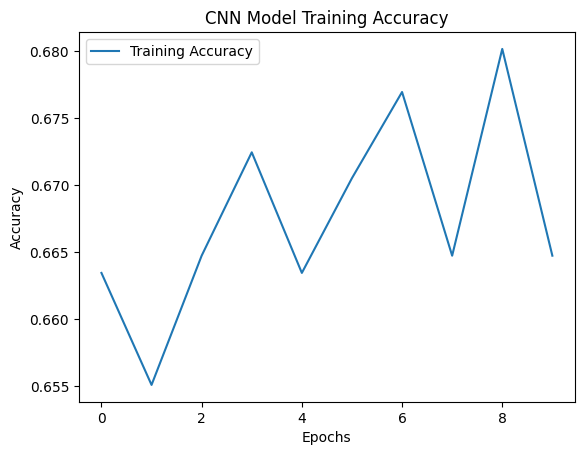

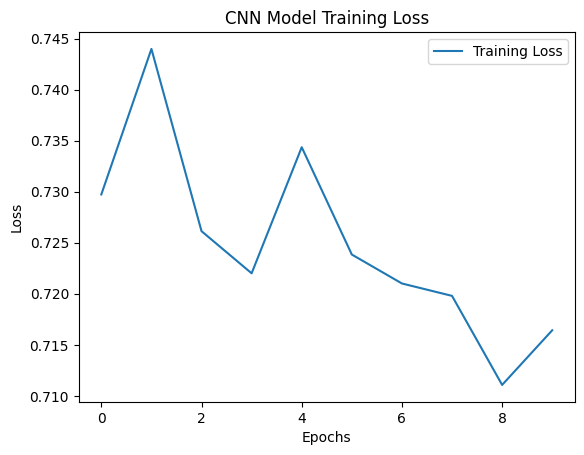

13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7190 - loss: 0.6525
Test Loss: 0.6511923670768738
Test Accuracy: 0.7076923251152039


In [11]:
# Plot CNN history
def plot_cnn_history(history, model, test_data):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('CNN Model Training Accuracy')
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('CNN Model Training Loss')
    plt.show()

    test_loss, test_accuracy = model.evaluate(test_data)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

plot_cnn_history(cnn_history, cnn_model, test_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step


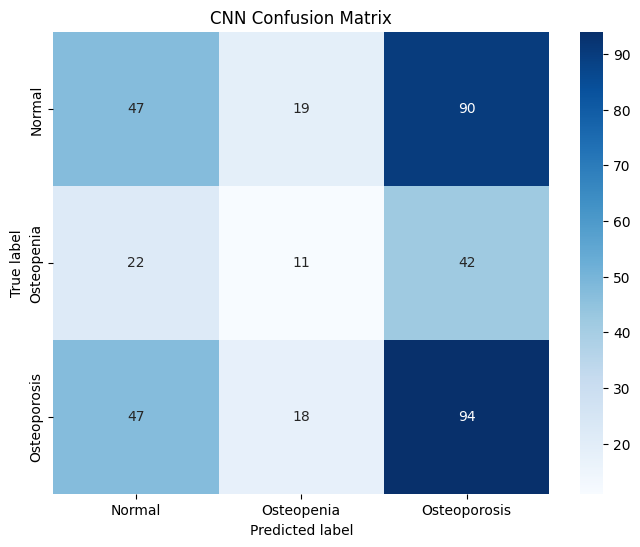

In [14]:
# Predictions
y_true = test_generator.classes
y_pred = np.argmax(cnn_model.predict(test_generator), axis=-1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('CNN Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

f1 = f1_score(y_true, y_pred, average='weighted')